🚀 Fases del Proyecto: Análisis de Datos

Paso 1: Importación de Librerías

Para comenzar, importamos los módulos esenciales que nos permitirán manipular datos y crear visualizaciones. Solo necesitaremos tres librerías clave:

Pandas: Para la gestión y análisis de los DataFrames.

Seaborn: Para generar gráficos estadísticos de alta calidad.

Matplotlib: Para la personalización y detalle de nuestras gráficas.

In [1]:
# Importamos los modulos que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Introducción y Objetivos del Análisis**

“El objetivo de este proyecto es analizar el histórico de ventas de videojuegos para determinar qué marca, Sony o Nintendo, ha tenido un mayor impacto en el mercado. Para ello, responderemos a preguntas como: ¿Qué consola ha vendido más juegos? ¿Cuál es el género más popular? ¿Cómo han evolucionado sus ventas en el tiempo?”



🎮 **Batalla de Consolas: ¿Quién vendió más videojuegos?** 🎮

*Consolas de Sobremesa*

PlayStation (PS1) vs. Nintendo 64

PlayStation 2 (PS2) vs. Nintendo GameCube (GC)

PlayStation 3 (PS3) vs. Nintendo Wii

PlayStation 4 (PS4) vs. Nintendo Wii U

*Consolas Portátiles*

PlayStation Portable (PSP) vs. Nintendo DS

PlayStation Vita (PSV) vs. Nintendo 3DS


Paso 2: Carga de Datos sobre Ventas de Hardware

Para enriquecer el análisis y contextualizar las cifras de ventas de videojuegos, se carga un DataFrame adicional. Este contiene los datos de las ventas totales de hardware para cada una de las consolas que se van a comparar.

In [2]:
df_consolas = pd.read_csv(r'C:\Users\eduar\Desktop\EDA\src\data\venta_consolas.csv', sep='\t', encoding='latin-1')
df_consolas.set_index('Plataforma',inplace=True)
df_consolas

,América del norte,Europa,Japón,Resto del mundo,Global
Plataforma,,,,,
PS2,53.65,55.28,23.18,"27,9",160.01
DS,"57,92",51.84,"32,99",11.28,154.02
NS,52.78,"38,79","35,79",23.16,150.52
GB,43.18,40.05,32.47,"2,99",118.69
PS4,38.12,45.86,9.68,23.53,117.20
PS,40.78,31.09,21.59,9.04,102.49
Wii,45.51,33.12,12.77,10.23,101.63
PS3,29.60,30.87,10.47,16.47,87.40
PSP,21.62,25.31,20.02,15.57,82.52


| Columna | Tipo de Variable | Definición y Subtipo |
| :--- | :--- | :--- |
| **América del norte** | Numérica | Ventas o valor correspondiente a la región de Norteamérica. **(Continua)** |
| **Europa** | Numérica | Ventas o valor correspondiente a la región de Europa. **(Continua)** |
| **Japón** | Numérica | Ventas o valor correspondiente a la región de Japón. **(Continua)** |
| **Resto del mundo** | Numérica | Ventas o valor agregado del resto de regiones. **(Continua)** |
| **Global** | Numérica | Suma total o valor global de las ventas/métrica. **(Continua)** |

Paso 3: Construcción del DataFrame

Para llevar a cabo el análisis, se ha construido un DataFrame a partir de datos recopilados manualmente.

Fuente de Datos: www.vgchartz.com

Se eligió esta web por ser una referencia reconocida en la industria, con una base de datos muy completa sobre ventas de videojuegos, lo que la convierte en una fuente idónea para este proyecto.

In [ ]:
consolas = ['GB','GBC','GBA','SNES','NES','NS','GC','N64','Wii','WiiU','3DS','DS','PSP','PSV', 'PS', 'PS2','PS3','PS4','PS5']
generos = ['Role-Playing', 'Action', 'Adventure', 'Action-Adventure', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Shooter', 'Simulation', 'Sports', 'Strategy']

# Conseguimos los datos en un bucle doble primero buscamos por cada plataforma y generos

lista_de_dataframes = []

for consola in consolas:
    for genero in generos:
        # Este metodo de web scraping lo encontré por youtube y me ha resultado muy útil extraia exactamente lo que quería
        url = f'https://www.vgchartz.com/games/games.php?name=&keyword=&console={consola}&region=All&developer=&publisher=&goty_year=&genre={genero}&boxart=Both&banner=Both&ownership=Both&showmultiplat=No&results=200&order=Sales&showtotalsales=0&showtotalsales=1&showpublisher=0&showvgchartzscore=0&shownasales=0&shownasales=1&showdeveloper=0&showcriticscore=0&showpalsales=0&showpalsales=1&showreleasedate=0&showreleasedate=1&showuserscore=0&showjapansales=0&showjapansales=1&showlastupdate=0&showothersales=0&showothersales=1&showshipped=0'
        # Creo la variable df_temporal para que el bucle me funcione como deseo
        df_temporal = pd.read_html(url)[-2]
        # La tabla me salia en un formato que no me gustaba y con esto me quedo solo con los titulos de la columnas
        df_temporal.columns = df_temporal.columns.get_level_values(2)
        
        df_temporal['Genero'] = genero
        df_temporal['Plataforma'] = consola
        
        lista_de_dataframes.append(df_temporal)

df_final = pd.concat(lista_de_dataframes, ignore_index=True)

In [ ]:
df_final.to_csv('datos_videojuegos_definitivo.csv', index=False) #Guardo el DataFrame como CSV para no tener que volver a realizar el Web Scraping

In [3]:
df_cargado = pd.read_csv(r'C:\Users\eduar\Desktop\EDA\src\data\datos_videojuegos_definitivo.csv') # Cargo el DataFrame y veo que hay mucha informacion que no quiero tener
df_cargado


,Pos,Game,Game.1,Console,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,Release Date,Unnamed: 10_level_2,Genero,Plataforma
0,1,NaN,Pokémon Red / Green / Blue Version,NaN,31.37m,11.27m,8.89m,10.22m,1.00m,30th Sep 98,NaN,Role-Playing,GB
1,2,NaN,Pokémon Gold / Silver Version,NaN,23.10m,9.00m,6.18m,7.20m,0.71m,14th Oct 00,NaN,Role-Playing,GB
2,3,NaN,Pokémon Yellow: Special Pikachu Edition,NaN,14.64m,5.89m,5.04m,3.12m,0.59m,19th Oct 99,NaN,Role-Playing,GB
3,4,NaN,Dragon Quest Monsters,NaN,2.35m,NaN,NaN,2.34m,0.01m,31st Dec 99,NaN,Role-Playing,GB
4,5,NaN,Yu-Gi-Oh: Duel Monsters 4,NaN,2.18m,NaN,NaN,2.17m,0.01m,07th Dec 00,NaN,Role-Playing,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22887,22,NaN,The Land Beneath Us,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strategy,PS5
22888,23,NaN,War Hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strategy,PS5
22889,24,NaN,"Warhammer 40,000: Chaos Gate – Daemonhunters",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strategy,PS5
22890,25,NaN,Warhammer Age of Sigmar: Realms of Ruin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strategy,PS5


Paso 4: Limpieza y Preprocesamiento del DataFrame Principal

Una vez cargados los datos, el siguiente paso crucial es la limpieza y modificación del DataFrame principal. Este proceso asegura la calidad, consistencia y formato adecuado de los datos, preparándolos para un análisis preciso.

In [4]:
#seleciono las columnas que deseo trabajar con ellas y les cambio los nombres
df_cargado=df_cargado[['Game.1','Total Sales','NA Sales','PAL Sales','Japan Sales','Other Sales','Release Date','Genero','Plataforma']]
nuevos_nombres = [
    'Nombre',
    'Ventas Totales',
    'Ventas Norte América',
    'Ventas Europa',
    'Ventas Japón',
    'Ventas Otros',
    'Fecha Salida',
    'Genero',
    'Plataforma'
]
df_cargado.columns = nuevos_nombres

In [5]:
# Voy a darle formato numerico a las columnas para poder trabajar con ellas
# Lista de columnas a modificar
columnas_ventas = [
    'Ventas Totales',
    'Ventas Norte América',
    'Ventas Europa',
    'Ventas Japón',
    'Ventas Otros'
]

for col in columnas_ventas:
    # Reemplaza 'm' y convierte a numérico 
    df_cargado.loc[:, col] = pd.to_numeric(df_cargado[col].str.replace('m', ''), errors='coerce')

In [6]:
# elimino todos los Nan porque no quiero trabajar con filas que no esten completas.
df=df_cargado.copy()
df['Nombre'] = df['Nombre'].str.replace(' Read the review', '')
df.dropna(axis=0,how="any",inplace=True)
df = df.reset_index(drop=True)
df.set_index('Nombre',inplace=True)


In [7]:
filas_antes = len(df_cargado)
df.dropna(axis=0, how="any", inplace=True)
filas_despues = len(df)
print(f"Se eliminaron {filas_antes - filas_despues} filas con valores nulos.")

Se eliminaron 20631 filas con valores nulos.


In [ ]:
# Le cambio el formato a la columna fecha de salida para trabajar con uno que estoy mas acostumbrado
df.loc[:, 'Fecha Salida'] = pd.to_datetime(df['Fecha Salida'], dayfirst=True, errors='coerce')
df

,Ventas Totales,Ventas Norte América,Ventas Europa,Ventas Japón,Ventas Otros,Fecha Salida,Genero,Plataforma
Nombre,,,,,,,,
Pokémon Red / Green / Blue Version,31.37,11.27,8.89,10.22,1.0,1998-09-30 00:00:00,Role-Playing,GB
Pokémon Gold / Silver Version,23.1,9.0,6.18,7.2,0.71,2000-10-14 00:00:00,Role-Playing,GB
Pokémon Yellow: Special Pikachu Edition,14.64,5.89,5.04,3.12,0.59,1999-10-19 00:00:00,Role-Playing,GB
Harry Potter and the Sorcerer's Stone,1.73,0.94,0.62,0.1,0.07,2001-11-21 00:00:00,Action,GB
The Legend of Zelda: Link's Awakening,3.83,2.21,0.96,0.54,0.13,1993-08-01 00:00:00,Adventure,GB
...,...,...,...,...,...,...,...,...
Pro Evolution Soccer 2018,0.75,0.12,0.36,0.19,0.09,2017-09-12 00:00:00,Sports,PS4
Pro Evolution Soccer 2017,0.75,0.08,0.41,0.18,0.09,2016-09-13 00:00:00,Sports,PS4
Everybody's Golf,0.56,0.12,0.22,0.17,0.06,2017-08-29 00:00:00,Sports,PS4


In [ ]:
# Voy a añadir una nueva columna para poder agrupar por compañia para ello voy a crear una funcion sencilla.

plataformas_nintendo = ['GB','GBC','GBA','SNES','NES','NS','GC','N64','Wii','WiiU','3DS','DS']
plataformas_sony = ['PS', 'PS2', 'PS3', 'PS4', 'PS5', 'PSP', 'PSV']

def asignar_marca(plataforma):
    if plataforma in plataformas_nintendo:
        return 'Nintendo'
    elif plataforma in plataformas_sony:
        return 'Sony'

df['Marca'] = df['Plataforma'].apply(asignar_marca)
df

,Ventas Totales,Ventas Norte América,Ventas Europa,Ventas Japón,Ventas Otros,Fecha Salida,Genero,Plataforma,Marca
Nombre,,,,,,,,,
Pokémon Red / Green / Blue Version,31.37,11.27,8.89,10.22,1.0,1998-09-30 00:00:00,Role-Playing,GB,Nintendo
Pokémon Gold / Silver Version,23.1,9.0,6.18,7.2,0.71,2000-10-14 00:00:00,Role-Playing,GB,Nintendo
Pokémon Yellow: Special Pikachu Edition,14.64,5.89,5.04,3.12,0.59,1999-10-19 00:00:00,Role-Playing,GB,Nintendo
Harry Potter and the Sorcerer's Stone,1.73,0.94,0.62,0.1,0.07,2001-11-21 00:00:00,Action,GB,Nintendo
The Legend of Zelda: Link's Awakening,3.83,2.21,0.96,0.54,0.13,1993-08-01 00:00:00,Adventure,GB,Nintendo
...,...,...,...,...,...,...,...,...,...
Pro Evolution Soccer 2018,0.75,0.12,0.36,0.19,0.09,2017-09-12 00:00:00,Sports,PS4,Sony
Pro Evolution Soccer 2017,0.75,0.08,0.41,0.18,0.09,2016-09-13 00:00:00,Sports,PS4,Sony
Everybody's Golf,0.56,0.12,0.22,0.17,0.06,2017-08-29 00:00:00,Sports,PS4,Sony


| Columna | Tipo de Variable | Definición y Subtipo |
| :--- | :--- | :--- |
| **Ventas Totales** | Numérica | Ventas globales totales del producto. **(Continua)** |
| **Ventas Norte América** | Numérica | Ventas específicas en la región de Norteamérica. **(Continua)** |
| **Ventas Europa** | Numérica | Ventas específicas en la región de Europa. **(Continua)** |
| **Ventas Japón** | Numérica | Ventas específicas en la región de Japón. **(Continua)** |
| **Ventas Otros** | Numérica | Ventas en todas las demás regiones no especificadas. **(Continua)** |
| **Fecha Salida** | Temporal | Fecha de lanzamiento del producto. **(Fecha/Hora)** |
| **Genero** | Categórica | Género o categoría a la que pertenece el producto (ej. Acción, RPG). **(Nominal)** |
| **Plataforma** | Categórica | Dispositivo o sistema en el que se utiliza el producto (ej. PS5, PC). **(Nominal)** |
| **Marca** | Categórica | Empresa desarrolladora o publicadora del producto (ej. Nintendo, Sony). **(Nominal)** |

Paso 5: Fase de Análisis y Visualización de Resultados

Con los datos ya limpios y estructurados, damos paso a la fase de análisis exploratorio. En esta sección, se realizarán las operaciones y se generarán las gráficas necesarias para responder a las preguntas clave del proyecto y extraer conclusiones significativas.

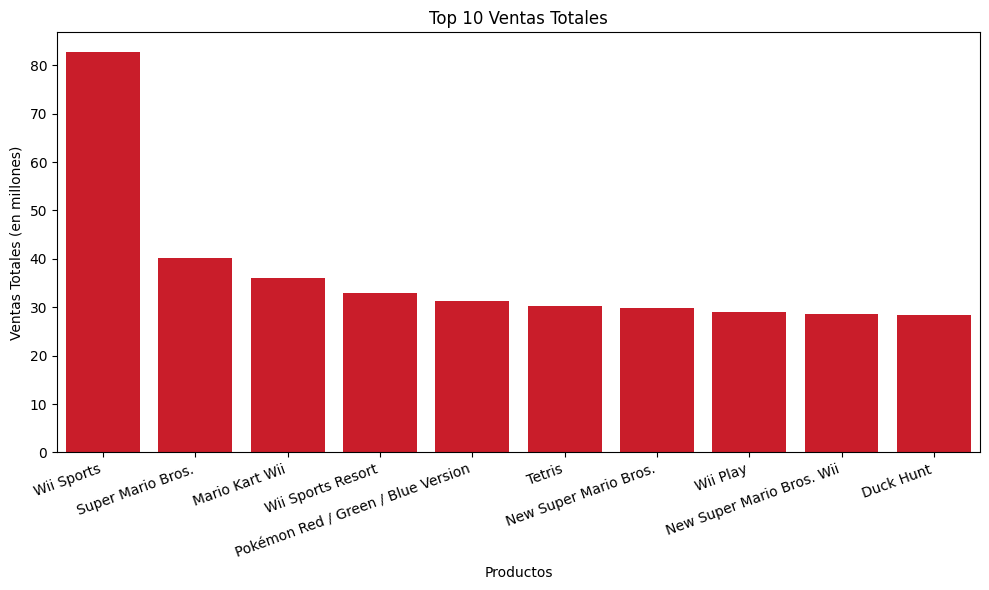

In [ ]:
# ¿Cuál es el Top 10 de los videojuegos más vendidos de la historia en este dataset?
ventas_totales=df['Ventas Totales'].sort_values(ascending=False).head(10).to_frame()
ventas_totales
plt.figure(figsize=(10, 6)) 
sns.barplot(x=ventas_totales.index, y=ventas_totales['Ventas Totales'],color='#E60012')
plt.title('Top 10 Ventas Totales')
plt.ylabel('Ventas Totales (en millones)')
plt.xlabel('Productos')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show();
# Podemos observar que los juegos que aparecen son exclusivos de Nintendo no hay ningun juego multiplataforma

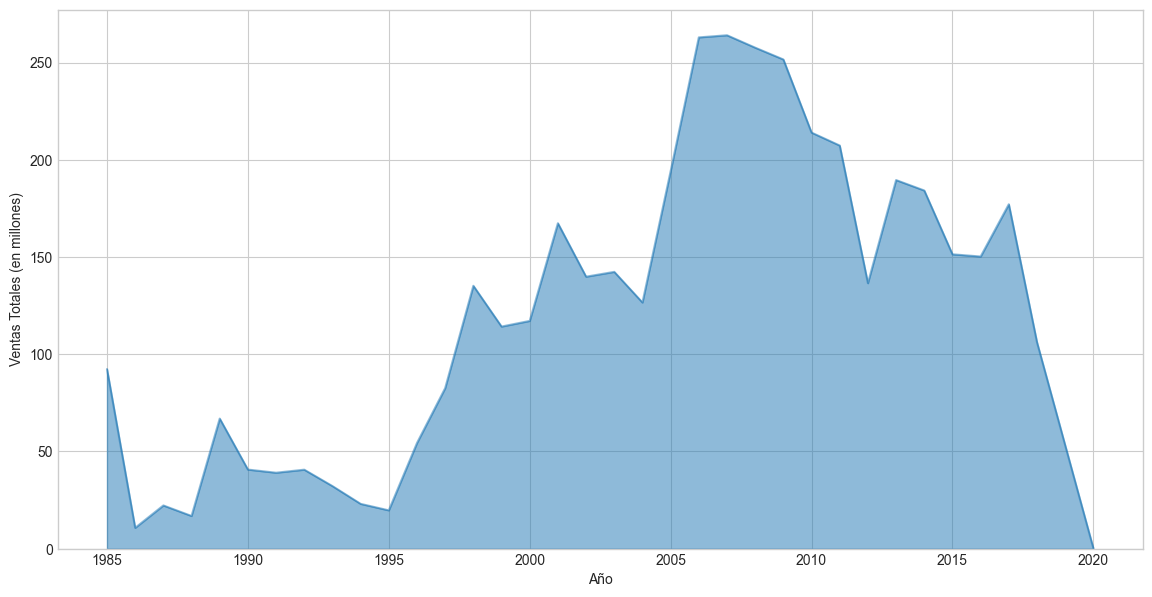

In [ ]:
# Sacamos los gráficos de la evolucion temporal en las ventas
df['Año'] = df['Fecha Salida'].dt.year

ventas_por_año = df.groupby('Año')['Ventas Totales'].sum()# Agrupamos por año y sumamos

plt.style.use('seaborn-v0_8-whitegrid')

fig, ax = plt.subplots(figsize=(14, 7))

ventas_por_año.plot(
    kind='area',
    ax=ax,
    alpha=
    xlabel='Año',
    ylabel='Ventas Totales (en millones)'
)

plt.show();

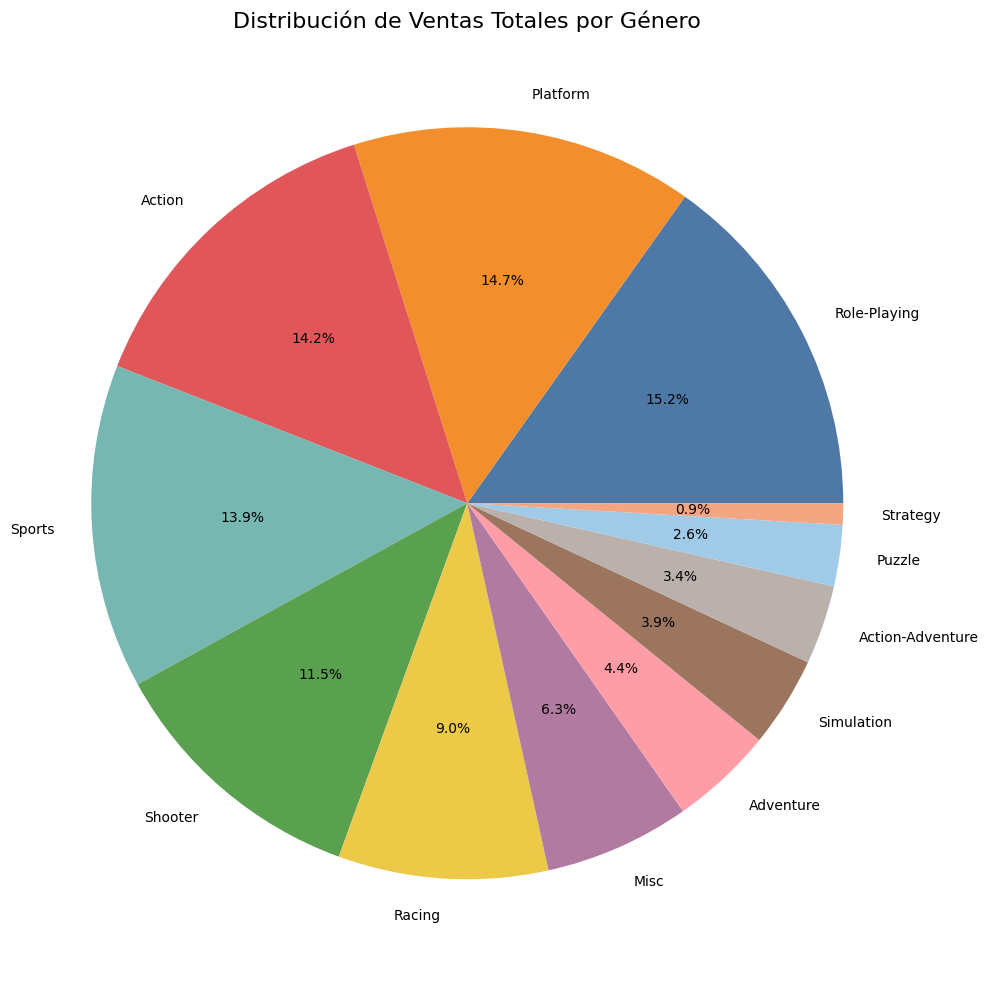

In [ ]:
#¿Qué género ha generado más ventas totales sumando todas las consolas?
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

generos_mas_vendidos = df.groupby('Genero')['Ventas Totales'].sum().sort_values(ascending=False).to_frame()

colores_profesionales_12 = [
    '#4E79A7', '#F28E2C', '#E15759', '#76B7B2', '#59A14F', '#EDC948',
    '#B07AA1', '#FF9DA7', '#9C755F', '#BAB0AC', '#A0CBE8', '#F4A582'
]
generos_mas_vendidos.plot(
    kind='pie',
    y='Ventas Totales',
    figsize=(10, 10),
    autopct='%1.1f%%',
    colors=colores_profesionales_12,
    legend=False,
)

plt.ylabel('')
plt.axis('equal') 
plt.title('Distribución de Ventas Totales por Género', fontsize=16)
plt.tight_layout()

plt.show()

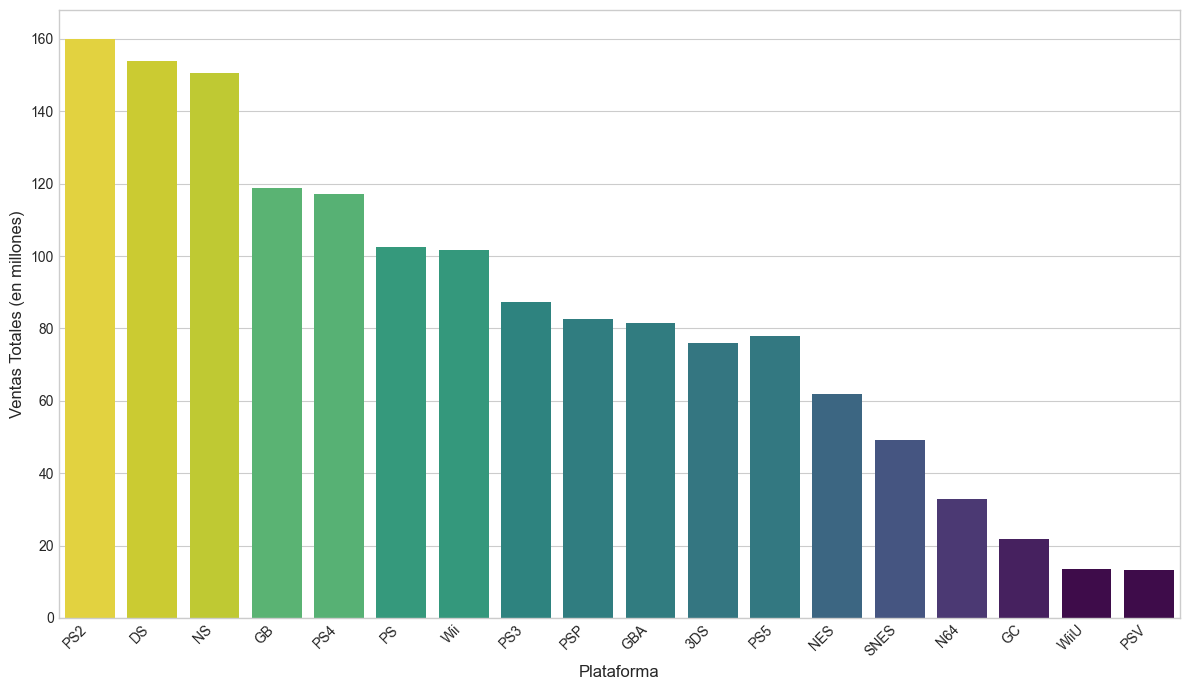

In [ ]:
#¿Cuál es la consola con mayores ventas de juegos totales acumuladas?
df_consolas['Global'].sort_values(ascending=False).to_frame()
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))

sns.barplot(
    legend=False,
    x=df_consolas['Plataforma'], 
    y=df_consolas['Global'],
    palette='viridis',
    hue=df_consolas['Global']
)

plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show();

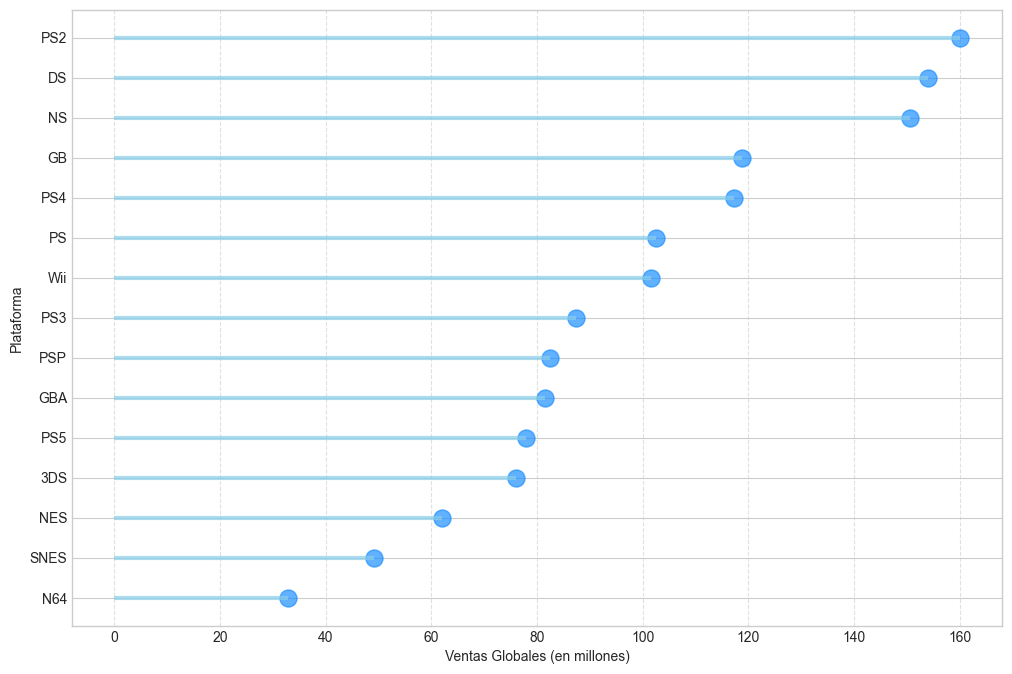

In [ ]:
#Utilizaré este grafico en la presentacion para dar variedad de estilos
ventas_por_plataforma = df_consolas.groupby('Plataforma')['Global'].sum().reset_index()
df_sorted = ventas_por_plataforma.sort_values('Global', ascending=True).tail(15) # Mostramos el top 15

plt.figure(figsize=(12, 8))

plt.hlines(
    y=df_sorted['Plataforma'],
    xmin=0,
    xmax=df_sorted['Global'],
    color='skyblue',
    alpha=0.7,
    linewidth=3
)
plt.scatter(
    df_sorted['Global'],
    df_sorted['Plataforma'],
    color='dodgerblue',
    alpha=0.7,
    s=150
)

plt.xlabel('Ventas Globales (en millones)')
plt.ylabel('Plataforma')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

**Comienzo los enfrentamientos directos**

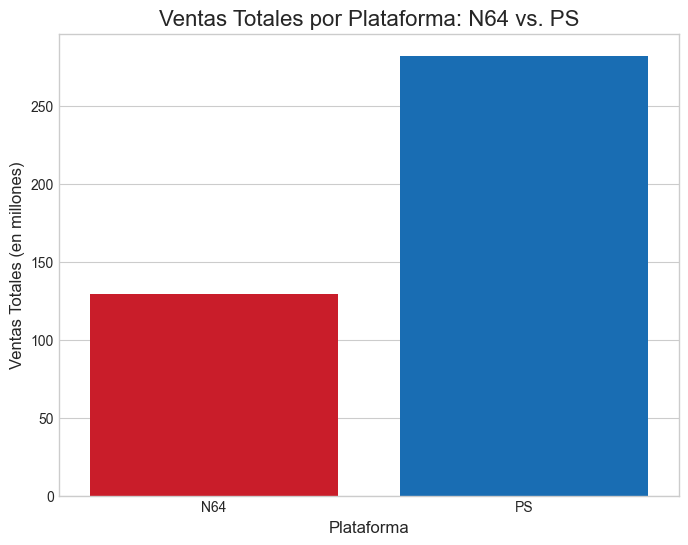

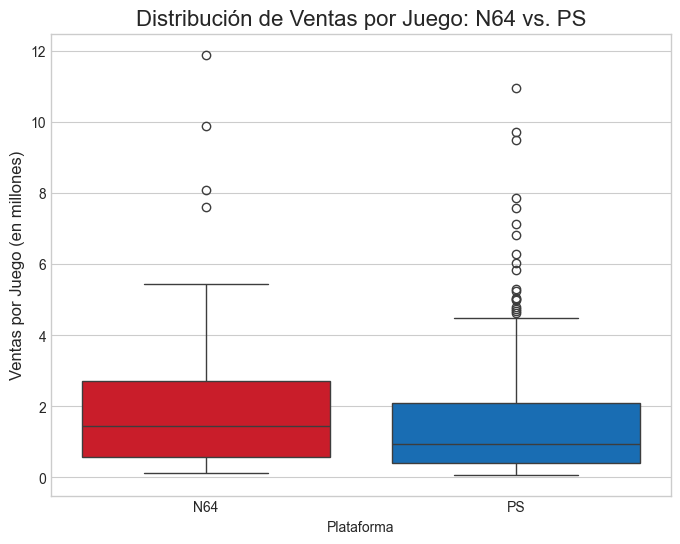

In [ ]:
#N64 vs PS1
plataformas_a_comparar = ['N64', 'PS']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PS': '#0070CC',
    'N64': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: N64 vs. PS', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.show()

plataformas_a_comparar = ['N64', 'PS']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
colores_personalizados = {'PS': '#0070CC', 'N64': '#E60012'}
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_filtrado,
    x='Plataforma',
    y='Ventas Totales',
    hue='Plataforma',
    legend=False,
    palette=colores_personalizados
)
plt.title('Distribución de Ventas por Juego: N64 vs. PS', fontsize=16)
plt.ylabel('Ventas por Juego (en millones)', fontsize=12)
plt.show()

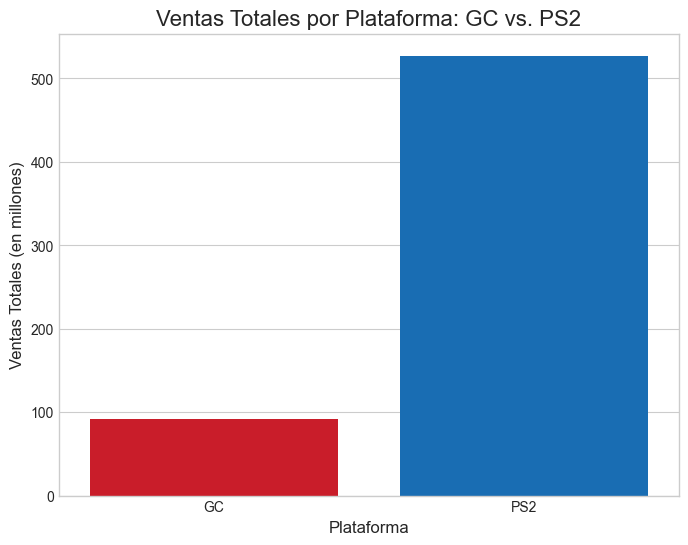

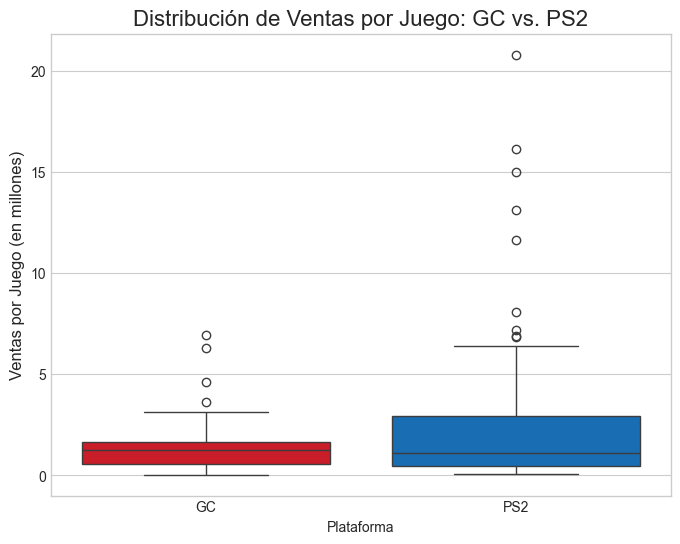

In [ ]:
#GC vs PS2
plataformas_a_comparar = ['GC', 'PS2']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PS2': '#0070CC',
    'GC': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: GC vs. PS2', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.show()

plataformas_a_comparar = ['GC', 'PS2']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
colores_personalizados = {'PS2': '#0070CC', 'GC': '#E60012'}
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_filtrado,
    x='Plataforma',
    y='Ventas Totales',
    hue='Plataforma',
    legend=False,
    palette=colores_personalizados
)
plt.title('Distribución de Ventas por Juego: GC vs. PS2', fontsize=16)
plt.ylabel('Ventas por Juego (en millones)', fontsize=12)
plt.show()

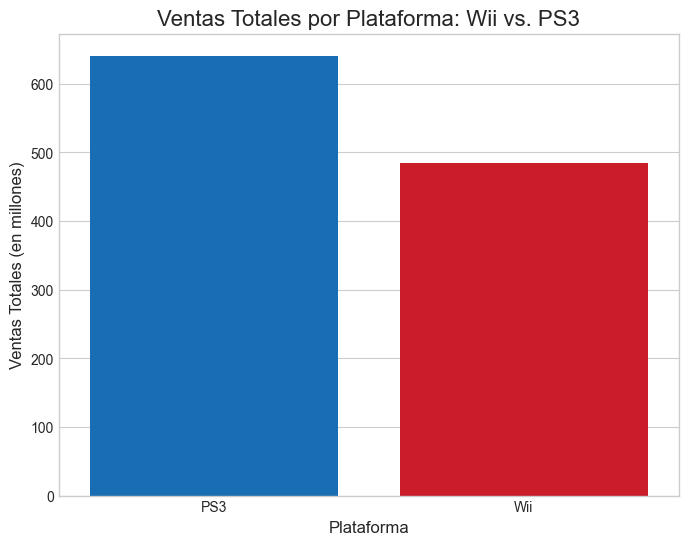

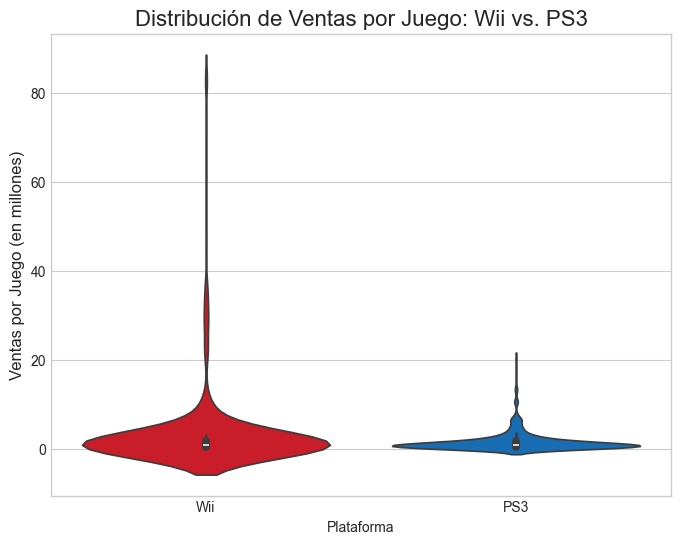

In [ ]:
#Wii vs PS3
plataformas_a_comparar = ['Wii', 'PS3']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PS3': '#0070CC',
    'Wii': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: Wii vs. PS3', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.show()

# Aquí tengo que usar el grafico de violin ya que wii tiene un gran outlier y del otro modo no se ve bien
plataformas_a_comparar = ['Wii', 'PS3']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
colores_personalizados = {'PS3': '#0070CC', 'Wii': '#E60012'}
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=df_filtrado,
    x='Plataforma',
    y='Ventas Totales',
    hue='Plataforma',
    legend=False,
    palette=colores_personalizados
)
plt.title('Distribución de Ventas por Juego: Wii vs. PS3', fontsize=16)
plt.ylabel('Ventas por Juego (en millones)', fontsize=12)
plt.show()


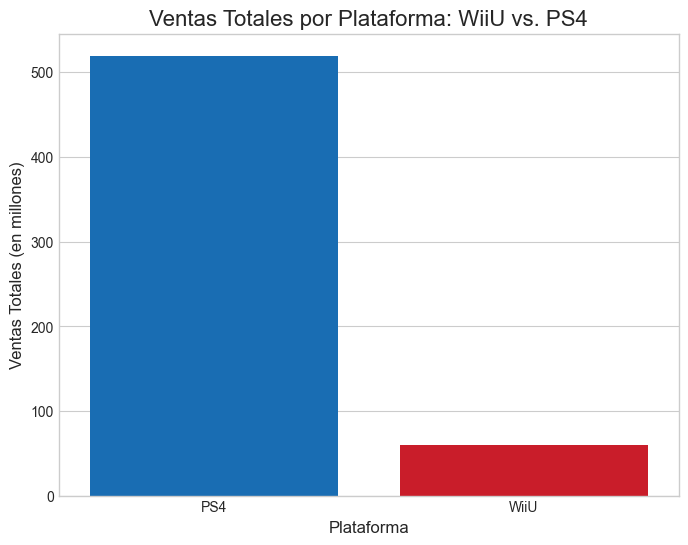

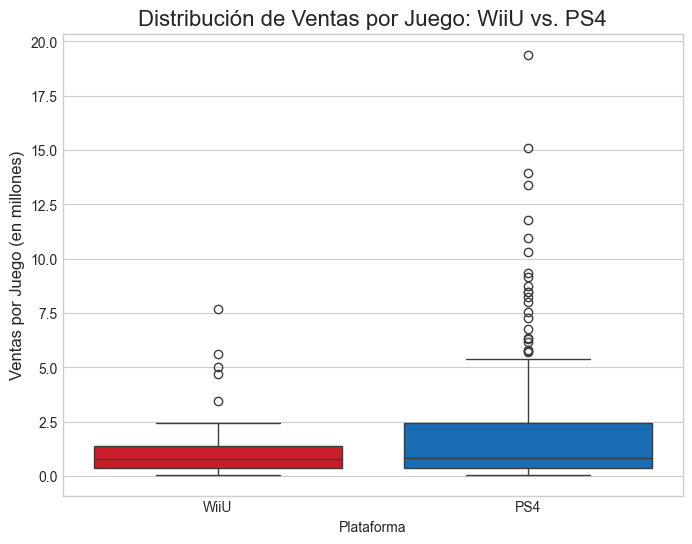

In [ ]:
#WiiU vs PS4
plataformas_a_comparar = ['WiiU', 'PS4']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PS4': '#0070CC',
    'WiiU': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: WiiU vs. PS4', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.show()

plataformas_a_comparar = ['WiiU', 'PS4']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
colores_personalizados = {'PS4': '#0070CC', 'WiiU': '#E60012'}
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_filtrado,
    x='Plataforma',
    y='Ventas Totales',
    hue='Plataforma',
    legend=False,
    palette=colores_personalizados
)
plt.title('Distribución de Ventas por Juego: WiiU vs. PS4', fontsize=16)
plt.ylabel('Ventas por Juego (en millones)', fontsize=12)
plt.show()

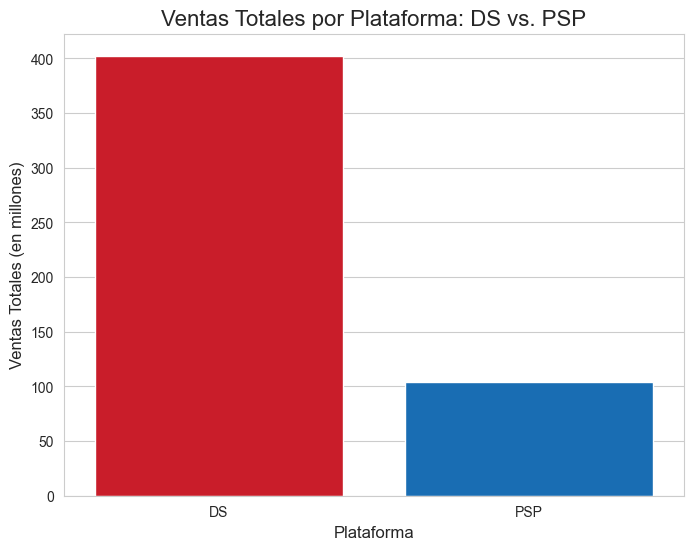

In [ ]:
#DS vs PSP
plataformas_a_comparar = ['DS', 'PSP']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PSP': '#0070CC',
    'DS': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: DS vs. PSP', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.show()

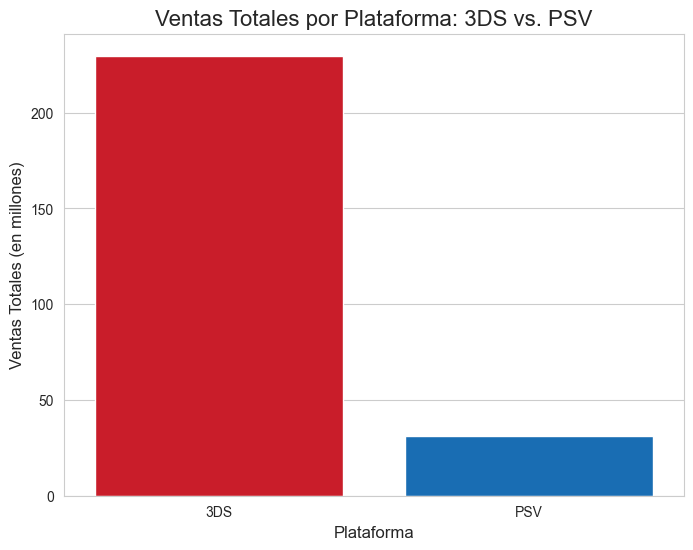

In [ ]:
#3DS vs PSV
plataformas_a_comparar = ['3DS', 'PSV']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
ventas_agrupadas = df_filtrado.groupby('Plataforma')['Ventas Totales'].sum().reset_index()
colores_personalizados = {
    'PSV': '#0070CC',
    '3DS': '#E60012'
}
plt.figure(figsize=(8, 6))
sns.barplot(
    data=ventas_agrupadas,
    x='Plataforma',
    y='Ventas Totales',
    palette=colores_personalizados,
    legend=False,
    hue='Plataforma'
)
plt.title('Ventas Totales por Plataforma: 3DS vs. PSV', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (en millones)', fontsize=12)
plt.show()

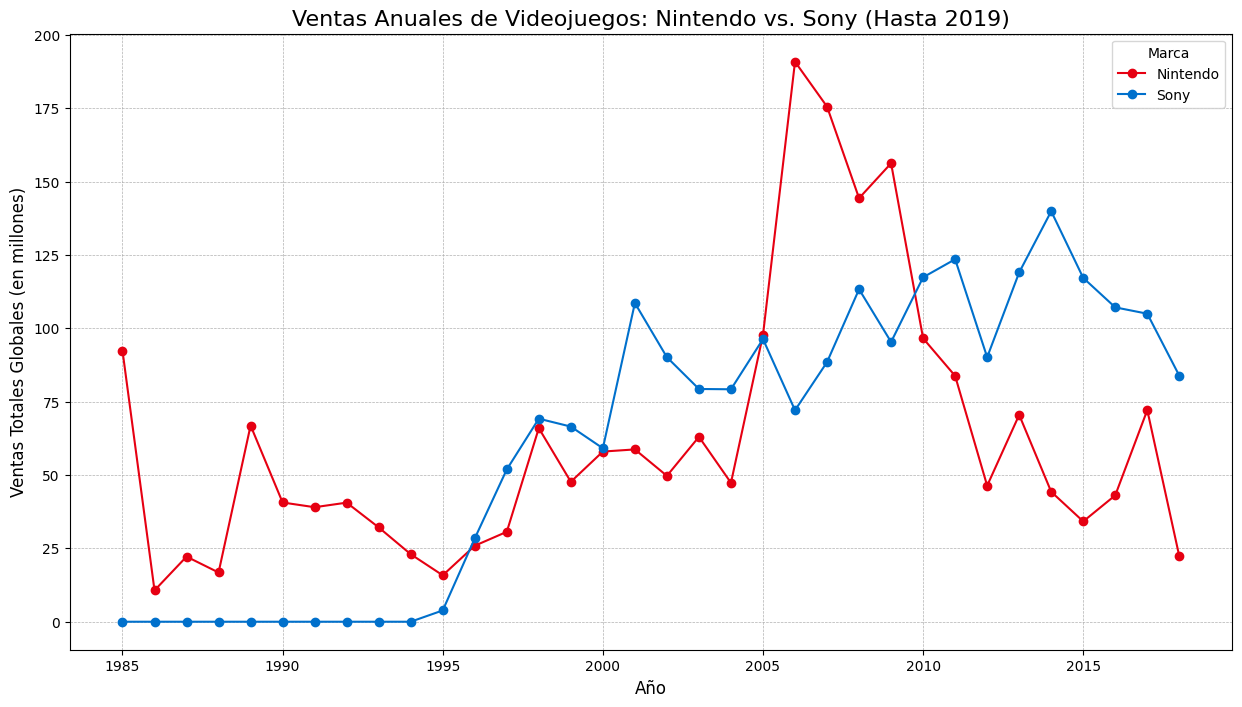

In [ ]:
# Un gráfico lineal con las ventas en el tiempo
ventas_anuales = df.groupby(['Año', 'Marca'])['Ventas Totales'].sum().unstack().fillna(0)
ventas_hasta_2019 = ventas_anuales[ventas_anuales.index <= 2019].copy()

marcas_a_graficar = ['Nintendo', 'Sony']
ventas_anuales_filtradas = ventas_hasta_2019[marcas_a_graficar]

ventas_anuales_filtradas.plot(
    kind='line',
    figsize=(15, 8),
    marker='o',
    color={'Sony': '#0070CC', 'Nintendo': '#E60012'}
)

plt.title('Ventas Anuales de Videojuegos: Nintendo vs. Sony (Hasta 2019)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Ventas Totales Globales (en millones)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Marca')
plt.show()

🗑️ Anexo: Ideas y Pruebas Descartadas
En esta sección se documentan algunas aproximaciones que se consideraron durante el análisis pero que finalmente no formaron parte del resultado final.

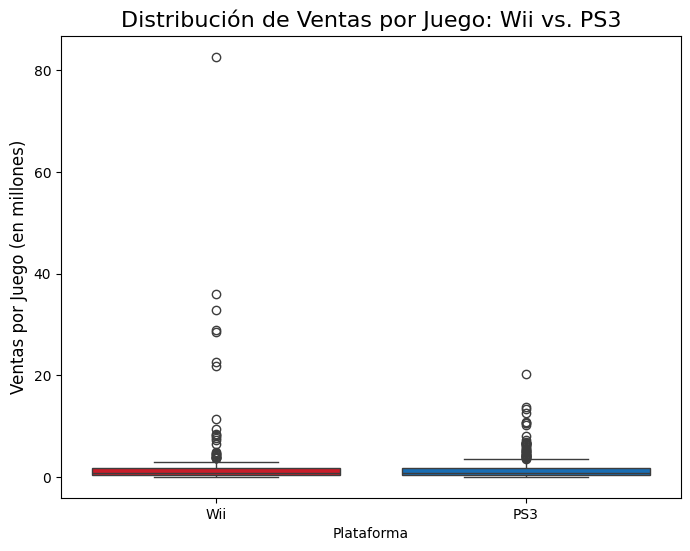

In [ ]:
plataformas_a_comparar = ['Wii', 'PS3']
df_filtrado = df[df['Plataforma'].isin(plataformas_a_comparar)]
colores_personalizados = {'PS3': '#0070CC', 'Wii': '#E60012'}
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_filtrado,
    x='Plataforma',
    y='Ventas Totales',
    hue='Plataforma',
    legend=False,
    palette=colores_personalizados
)
plt.title('Distribución de Ventas por Juego: Wii vs. PS3', fontsize=16)
plt.ylabel('Ventas por Juego (en millones)', fontsize=12)
plt.show()

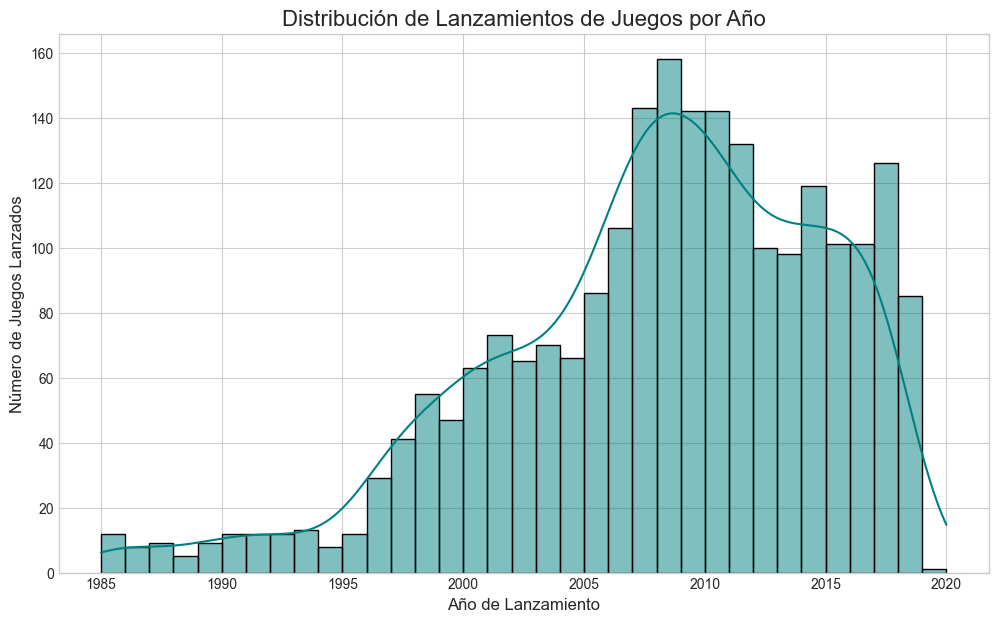

In [ ]:
#Histograma de Años de Lanzamiento

df['Año'] = pd.to_datetime(df['Fecha Salida'], errors='coerce').dt.year

plt.figure(figsize=(12, 7))

sns.histplot(
    data=df,
    x='Año',
    kde=True,       
    binwidth=1,      
    color='teal'
)

plt.title('Distribución de Lanzamientos de Juegos por Año', fontsize=16)
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Número de Juegos Lanzados', fontsize=12)
plt.show()

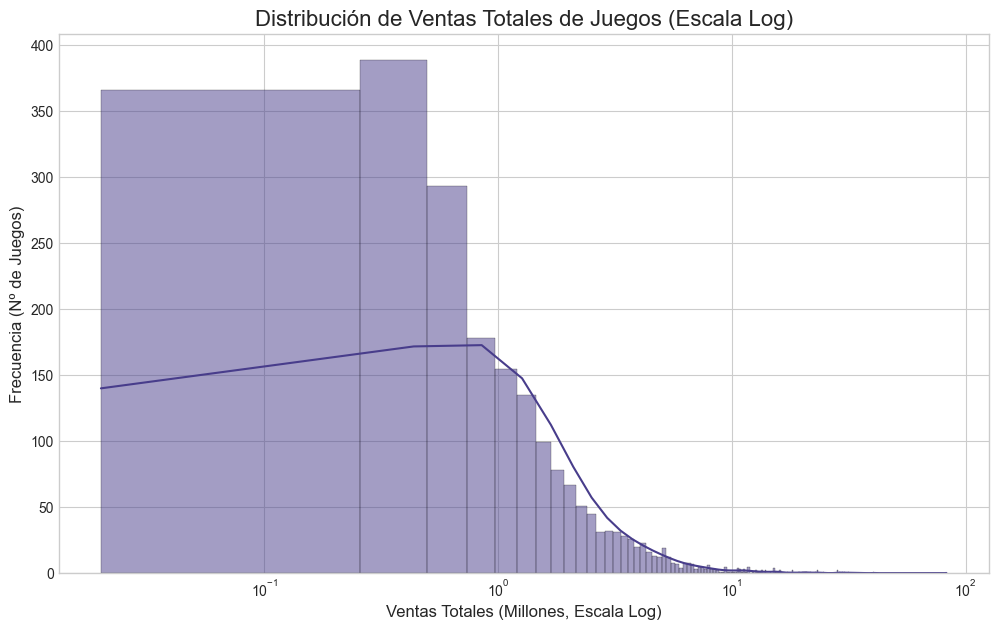

In [ ]:
# Histograma de las ventas totales
plt.figure(figsize=(12, 7))

sns.histplot(data=df, x='Ventas Totales', kde=True, color='darkslateblue')

plt.xscale('log')

plt.title('Distribución de Ventas Totales de Juegos (Escala Log)', fontsize=16)
plt.xlabel('Ventas Totales (Millones, Escala Log)', fontsize=12)
plt.ylabel('Frecuencia (Nº de Juegos)', fontsize=12)
plt.show()

Análisis Estadístico: ¿Existe una Diferencia Real en las Ventas? 📊

Para ir más allá de la simple comparación visual de los datos, realizamos una prueba de hipótesis. El objetivo es determinar si la diferencia observada en las ventas totales entre Sony y Nintendo es estadísticamente significativa o si, por el contrario, podría deberse simplemente al azar.

Prueba U de Mann-Whitney

Hemos elegido la Prueba U de Mann-Whitney por ser un método no paramétrico robusto. Esto significa que no necesitamos asumir que nuestros datos de ventas siguen una distribución normal (como la campana de Gauss), lo que la hace ideal para datos del mundo real que a menudo no cumplen con este requisito.

La prueba evalúa las siguientes hipótesis:

Hipótesis Nula (H0): No existe una diferencia significativa en la distribución de las ventas de Sony y Nintendo. En términos simples, sus medianas de ventas son iguales.

Hipótesis Alternativa (H1): La distribución de ventas de Sony es diferente a la de Nintendo, lo que implica que sus medianas de ventas no son iguales.

In [55]:
from scipy.stats import mannwhitneyu
ventas_sony = df[df['Marca'] == 'Sony']['Ventas Totales'].dropna()
ventas_nintendo = df[df['Marca'] == 'Nintendo']['Ventas Totales'].dropna()

#Ejecutamos la prueba U de Mann-Whitney

stat, p_value = mannwhitneyu(ventas_sony, ventas_nintendo, alternative='two-sided')

#Mostramos los resultados de forma clara
print(f"Prueba U de Mann-Whitney para Ventas Totales")
print(f"Estadístico U: {stat:.2f}")
print(f"P-valor: {p_value}")

#Interpretamos el p-valor automáticamente
alpha = 0.05
if p_value < alpha:
    print("\nConclusión: El p-valor es menor que 0.05. Rechazamos la hipótesis nula.")
    print(">> Existe una diferencia estadísticamente significativa entre las ventas de Sony y Nintendo.")
else:
    print("\nConclusión: El p-valor es mayor o igual a 0.05. No podemos rechazar la hipótesis nula.")
    print(">> No hay suficiente evidencia para afirmar que existe una diferencia significativa en las ventas.")

Prueba U de Mann-Whitney para Ventas Totales
Estadístico U: 592153.00
P-valor: 0.043577464714617445

Conclusión: El p-valor es menor que 0.05. Rechazamos la hipótesis nula.
>> Existe una diferencia estadísticamente significativa entre las ventas de Sony y Nintendo.
